In [30]:
import re
import json
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
input_file = "Labels/turker_scores_full_interview.csv"
data = pd.read_csv(input_file)
filtered_data = data[data['Worker'] == 'AGGR']

column_extract = ['Participant', 'Overall', 'RecommendHiring', 'StructuredAnswers']
processed_data = filtered_data[column_extract]

processed_data.to_csv('Labels/processed_data.csv', index=False)
new_data = pd.read_csv("Labels/processed_data.csv")
new_data


,Participant,Overall,RecommendHiring,StructuredAnswers
0,p1,5.297316,5.106224,4.891580
1,p3,4.414892,4.433070,3.912199
2,p4,4.494494,4.530129,4.688379
3,p5,5.457670,5.571558,5.582514
4,p6,5.106512,4.831482,4.826245
...,...,...,...,...
133,pp83,6.045748,5.806617,4.878478
134,pp84,5.710073,6.020304,4.890114
135,pp85,5.626074,5.766592,4.918227
136,pp86,4.853881,4.700179,4.240302


In [8]:
script = pd.read_csv("Labels/interview_transcripts_by_turkers.csv")
script = "Labels/interview_transcripts_by_turkers.csv"


In [37]:
data_dict = {}
with open(script, 'r') as file:
    for line in file:
        parts = line.split(',', 1)
        if len(parts) == 2:
            participant_id = parts[0].strip()
            transcript = parts[1].strip()
            data_dict[participant_id] = transcript



In [38]:
df = pd.read_csv("Labels/processed_data.csv")
combined_data = {}
for participant_id, transcript in data_dict.items():
    matching_row = df[df['Participant'] == participant_id]
    
    if not matching_row.empty:
        overall = matching_row.iloc[0]['Overall']
        recommend_hiring = matching_row.iloc[0]['RecommendHiring']
        structured_answers = matching_row.iloc[0]['StructuredAnswers']
        
        combined_data[participant_id] = {
            "Transcript": transcript,
            "Overall": overall,
            "RecommendHiring": recommend_hiring,
            "StructuredAnswers": structured_answers
        }
output_file = 'Labels/combined_data.json'
with open(output_file, 'w') as json_file:
    json.dump(combined_data, json_file, indent=4)

In [11]:
# with open ("/Users/yuewentao/Desktop/Courses/CS6220/AI-Interview/Labels/processed_data.csv", 'r') as file:
#     data = json.load(file)
# print(data)

new_data

,Participant,Overall,RecommendHiring,StructuredAnswers
0,p1,5.297316,5.106224,4.891580
1,p3,4.414892,4.433070,3.912199
2,p4,4.494494,4.530129,4.688379
3,p5,5.457670,5.571558,5.582514
4,p6,5.106512,4.831482,4.826245
...,...,...,...,...
133,pp83,6.045748,5.806617,4.878478
134,pp84,5.710073,6.020304,4.890114
135,pp85,5.626074,5.766592,4.918227
136,pp86,4.853881,4.700179,4.240302


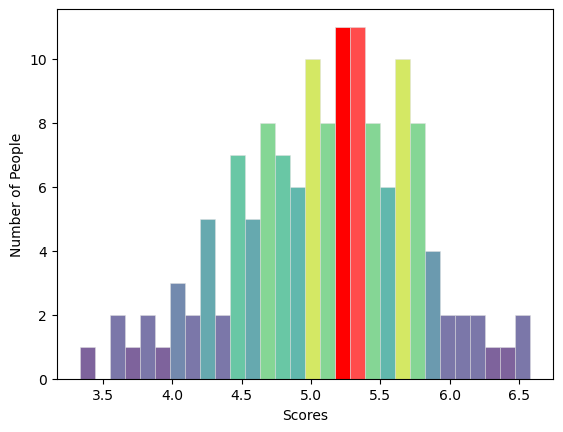

In [23]:
overall = new_data['Overall']
#plt.hist(overall, bins=20, edgecolor = 'black')
n, bins, patches = plt.hist(overall, bins=30, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.xlabel("Overall Scores")
plt.ylabel("Number of People")

n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
patches[17].set_fc('red')
patches[18].set_fc('red')
patches[17].set_alpha(1)
# plt.annotate('Important Bar!', xy=(0.57, 175), xytext=(2, 130), fontsize=15, arrowprops={'width':0.4,'headwidth':7,'color':'#333333'})


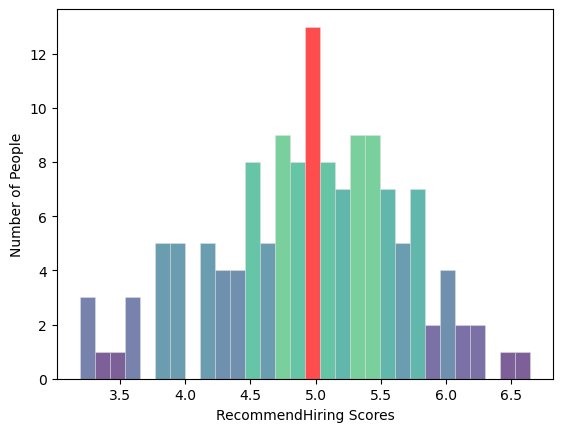

In [27]:
recommend = new_data['RecommendHiring']
#plt.hist(overall, bins=20, edgecolor = 'black')
n, bins, patches = plt.hist(recommend, bins=30, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.xlabel("RecommendHiring Scores")
plt.ylabel("Number of People")

n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
patches[15].set_fc('red')


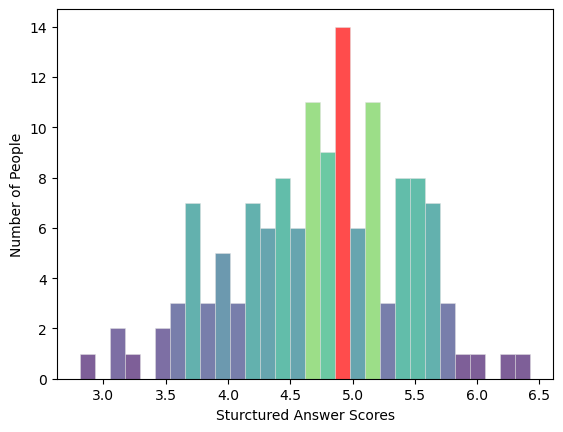

In [29]:
stucturedanswer = new_data['StructuredAnswers']
#plt.hist(overall, bins=20, edgecolor = 'black')
n, bins, patches = plt.hist(stucturedanswer, bins=30, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.xlabel("Sturctured Answer Scores")
plt.ylabel("Number of People")

n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
patches[17].set_fc('red')

In [35]:
transcripts_file = "/Users/yuewentao/Desktop/Courses/CS6220/AI-Interview/Labels/interview_transcripts_by_turkers.csv"


In [36]:
def count_words(string, exclude_keywords = None):
    if exclude_keywords == None:
        exclude_keywords = []
    clean_string = re.sub(r'[^\w\s|]', '', string)
    words = clean_string.split()
    filtered_words = [word for word in words if word.lower() not in map(str.lower, exclude_keywords)]
    return len(filtered_words)

input_words = "p1,Interviewer: So how are you doing?|Interviewee: Im pretty good.|Interviewer: Ok well  so please tell me about yourself.|Interviewee: ok  uhm  so have you looked at my resume or should I  alright  so I guess ah  I am course 6-7 here at M.I.T  ah which is computational biology  so its a mix of computers  science and biology and actually thats where my interest lie in applying like algorithmic kinda software engineering too datasets dealing with genomics and biology.  Uhm some of that activities that you do out side of school  include Camp Kesem which is a summer camp that we run for completely free for kids whose parents have cancer  as well as ah amphibious achievement  which is ah a high school tutoring program for inner city kids in Boston  |Interviewer:  mhhmm|Interviewee: So ah  my interest kinda laid both in a little bit of the health care  I imagined I was going be a Doctor growing up  and then it came down to the tee and Im like  well I can do engineering and still apply and do the same things and help a lot more people.|Interviewer: So please tell me about a time that you demonstrated leadership.|Interviewee: Ok  uhm  one of the things we have to do for Camp Kesem is orgin or fundraise all the money to ah  to  run the camp which is over $50 000.00.  Ah so one of the things that I individually spearhead every year is called the Camp Kesem I say you did auction  where actually my fraternity and I go out and solicit uhm  donations in the form of gift cards  ah to raise money for a date auction where we actually sell dates  and then we use this money obviously we donate it to Camp Kesem. I spearhead the entire event and I kinda orginize everyone into committees and groups  and I send the people out and make sure everything goes according to plan.  |Interviewer: Tell me about a time when your working on a team and faced with a challenge  how did you solve that problem?|Interviewee:  Ahh  I guess the easiest team project I just I just had  was  last semester  uhm I worked on this six double o five project which is algorithm or software architecture.|Interviewer:  uh hun.|Interviewee: and we were put in a group of 3 people  and it was standard you know we signed the contract everyone is supposed to work equally  but it ended up being by the end of it  that someone didn't like put there fair share of work in...Ah essentially we talked to him we didn't really get it out  we actually had to go to some of the T.A's we got a little bit ah  and that kinda like pushed him forward  so I mean I guess what I am showing is like  Im not affraid to go to the right method or like authority like where in cases this situation presents itself.  |Interviewer: Oh yes.  Alright tell me about one of your weaknesses and how you plan to overcome it.|Interviewee:  Uhmmm.  I would say for this job  ah Im a little technically underprepared.  Ah I've yet  I have only taken the introductory software classes so far and as well as introductory bio classes  but I think just from sheer interest and sheer effort i will be able to kinda overcome these obstacles.|Interviewer:  Now why do you think we should hire you?|Interviewee:  Ah  Im very interested  in the subject of computation biology  and I think that I will be able to contribute a lot to this field  uhm I've had a good amount of experience and I think I will be a solid intern.|Interviewer: Well thank you."
exclude_keywords = ["Interviewee", "Interviewer", "p1"]
print(count_words(input_words, exclude_keywords))



613
